# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

> **Note**: This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results and verify all findings independently.

## Overview

This notebook explores Dandiset 000690: "Allen Institute Openscope - Vision2Hippocampus project", which investigates how visual representations evolve across brain regions from the thalamus through visual cortex to the hippocampus in mice. The dataset contains Neuropixel electrophysiology recordings from multiple brain regions while mice were presented with various visual stimuli, including simple moving bars and naturalistic videos.

Dandiset link: [https://dandiarchive.org/dandiset/000690/0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015)

In this notebook, we'll:
1. Explore the metadata of the Dandiset
2. Examine the file structure
3. Load and explore a sample NWB file
4. Visualize LFP data from one probe
5. Analyze electrode locations and properties

## Required Packages

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient
from datetime import datetime

## Exploring the Dandiset Metadata

In [2]:
# Initialize a DANDI API client
client = DandiAPIClient()

# Get the Dandiset
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Get the raw metadata
metadata = dandiset.get_raw_metadata()

# Print basic metadata
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset DOI: {metadata['doi']}")
print(f"Version: {metadata['version']}")
print(f"Date published: {metadata['datePublished']}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Dandiset DOI: 10.48324/dandi.000690/0.250326.0015
Version: 0.250326.0015
Date published: 2025-03-26T00:15:32.143954+00:00


Let's look at the description to understand the purpose of this dataset:

In [3]:
print(metadata['description'][:1000] + "...")  # Print the first 1000 characters

Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away from the retina, through primary visual cortex, higher order visual areas and all the way to hippocampus, that is farthest removed from the retina?

The current OpenScope project aims to understand how the neural representations of simple and natural stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of the frontal areas. 

Stimuli presented
Two main categories of visual stimuli were presented–
1.	Simple visual motion, elicited by basic stimuli, like bars of ligh

### Keywords and Contributors

In [4]:
print("Keywords:")
for keyword in metadata['keywords']:
    print(f"- {keyword}")

Keywords:
- mouse
- neuropixel
- extracellular electrophysiology
- neocortex
- hippocampus
- Entorhinal cortex 
- excitatory
- inhibitory
- vision
- movies


In [5]:
print("Contributors:")
for contributor in metadata['contributor']:
    if 'name' in contributor and 'roleName' in contributor and contributor.get('includeInCitation', False):
        print(f"- {contributor['name']} ({', '.join(contributor['roleName'])})")

Contributors:
- Mehta, Mayank R (dcite:Conceptualization, dcite:ContactPerson, dcite:FormalAnalysis, dcite:Investigation, dcite:ProjectManager, dcite:ProjectLeader, dcite:Researcher)
- Purandare, Chinmay (dcite:Conceptualization, dcite:FormalAnalysis, dcite:Investigation, dcite:ProjectMember, dcite:ContactPerson)
- Jha, Siddharth (dcite:FormalAnalysis, dcite:Investigation, dcite:Researcher)
- Lecoq, Jérôme (dcite:ContactPerson, dcite:FundingAcquisition, dcite:ProjectLeader, dcite:ProjectManager, dcite:ProjectAdministration, dcite:Software, dcite:Supervision)
- Durand, Séverine (dcite:DataManager, dcite:FormalAnalysis, dcite:Supervision, dcite:DataCurator)
- Gillis, Ryan (dcite:DataCollector)
- Belski, Hannah (dcite:DataCollector)
- Bawany, Ahad (dcite:DataCurator, dcite:DataManager)
- Carlson, Mikayla (dcite:DataCollector)
- Peene, Carter (dcite:DataCurator, dcite:DataManager)
- Wilkes, Josh (dcite:DataCollector)
- Johnson, Tye (dcite:DataCollector)
- Naidoo, Robyn (dcite:DataCollector

## Exploring the Files in the Dandiset

In [6]:
# Get the assets (files) in the Dandiset
assets = list(dandiset.get_assets())
print(f"Total number of files: {len(assets)}")

# Show the first 10 files
print("\nSample of files:")
for asset in assets[:10]:
    print(f"- {asset.path}")

Total number of files: 156

Sample of files:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb
- sub-692077/sub-692077_ses-1300222049_probe-1_ecephys.nwb
- sub-695435/sub-695435_ses-1309235849_probe-3_ecephys.nwb
- sub-695435/sub-695435_ses-1309235849_probe-1_ecephys.nwb
- sub-695435/sub-695435_ses-1309235849_probe-0_ecephys.nwb
- sub-695435/sub-695435_ses-1309235849_probe-2_ecephys.nwb


Let's examine the file structure more closely to understand the organization:

In [7]:
# Extract subject IDs
subject_ids = set()
for asset in assets:
    # Extract subject ID from path (assumes format sub-XXXXXX/*)
    if asset.path.startswith('sub-'):
        subject_id = asset.path.split('/')[0]
        subject_ids.add(subject_id)

print(f"Number of subjects: {len(subject_ids)}")
print("Subject IDs (first 10):", list(subject_ids)[:10])

Number of subjects: 25
Subject IDs (first 10): ['sub-715811', 'sub-716465', 'sub-714624', 'sub-717437', 'sub-717441', 'sub-695435', 'sub-692077', 'sub-717438', 'sub-699322', 'sub-695762']


Let's check what kinds of NWB files are available for a single subject:

In [8]:
# Take one subject as an example
example_subject = list(subject_ids)[0]
subject_files = [asset for asset in assets if asset.path.startswith(f"{example_subject}/")]

print(f"Files for {example_subject}:")
for file in subject_files:
    print(f"- {file.path}")

Files for sub-715811:
- sub-715811/sub-715811_ses-1328842209_probe-3_ecephys.nwb
- sub-715811/sub-715811_ses-1328842209_probe-1_ecephys.nwb
- sub-715811/sub-715811_ses-1328842209_probe-0_ecephys.nwb
- sub-715811/sub-715811_ses-1328842209_probe-2_ecephys.nwb
- sub-715811/sub-715811_ses-1328842209.nwb
- sub-715811/sub-715811_ses-1328842209_probe-4_ecephys.nwb
- sub-715811/sub-715811_ses-1328842209_image.nwb


## Loading and Exploring an NWB File

Now let's load one of the NWB files to explore its contents. We'll use the file `sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb` as an example.

In [9]:
# Path to the NWB file we want to examine
file_path = "sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb"

# Get the asset and its download URL
asset = next(dandiset.get_assets_by_glob(file_path))
url = asset.download_url

# Open the file remotely without downloading
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Let's examine the NWB file metadata:

In [10]:
# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session ID: {nwb.session_id}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Stimulus notes: {nwb.stimulus_notes}")

Session description: LFP data and associated info for one probe
Identifier: 4
Session ID: 1300222049
Session start time: 2023-09-28 00:00:00-07:00
Institution: Allen Institute for Brain Science
Stimulus notes: OpenScopeVision2Hippocampus


### Subject Information

In [11]:
# Print information about the subject
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Age: {subject.age} (reference: {subject.age__reference})")
print(f"Age in days: {subject.age_in_days}")
print(f"Sex: {subject.sex}")
print(f"Species: {subject.species}")
print(f"Strain: {subject.strain}")
print(f"Genotype: {subject.genotype}")
print(f"Specimen name: {subject.specimen_name}")

Subject ID: 692077
Age: P89D (reference: birth)
Age in days: 89.0
Sex: F
Species: Mus musculus
Strain: Transgenic
Genotype: wt/wt
Specimen name: 692077


### Exploring Electrode Groups

In [12]:
# Print information about the electrode groups
print("Electrode groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"\nGroup: {group_name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Has LFP data: {group.has_lfp_data}")
    print(f"  Probe ID: {group.probe_id}")
    print(f"  LFP sampling rate: {group.lfp_sampling_rate}")
    
    device = group.device
    print(f"  Device description: {device.description}")
    print(f"  Device manufacturer: {device.manufacturer}")
    print(f"  Device sampling rate: {device.sampling_rate}")
    print(f"  Device probe ID: {device.probe_id}")

Electrode groups:

Group: probeF
  Description: Ecephys Electrode Group
  Location: See electrode locations
  Has LFP data: True
  Probe ID: 4
  LFP sampling rate: 625.0
  Device description: Neuropixels 1.0 Probe
  Device manufacturer: imec
  Device sampling rate: 30000.0
  Device probe ID: 4


### Exploring Electrodes Table

In [13]:
# Convert electrodes table to a pandas DataFrame for easier exploration
electrodes_df = nwb.electrodes.to_dataframe()

# Print basic information about the electrodes
print(f"Number of electrodes: {len(electrodes_df)}")
print(f"Columns in electrodes table: {list(electrodes_df.columns)}")

# Display the first few rows
electrodes_df.head()

Number of electrodes: 96
Columns in electrodes table: ['location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering']


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
4002,DP,probeF abc.EcephysElectrodeGroup at 0x13962571...,probeF,40,59,4,2,True,3523.0,4566.0,5834.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4006,DP,probeF abc.EcephysElectrodeGroup at 0x13962571...,probeF,80,59,4,6,True,3531.0,4533.0,5848.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4010,DP,probeF abc.EcephysElectrodeGroup at 0x13962571...,probeF,120,59,4,10,True,3538.0,4501.0,5862.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4014,DP,probeF abc.EcephysElectrodeGroup at 0x13962571...,probeF,160,59,4,14,True,3548.0,4461.0,5879.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4018,DP,probeF abc.EcephysElectrodeGroup at 0x13962571...,probeF,200,59,4,18,True,3554.0,4429.0,5893.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


Let's visualize the spatial distribution of electrodes for this probe:

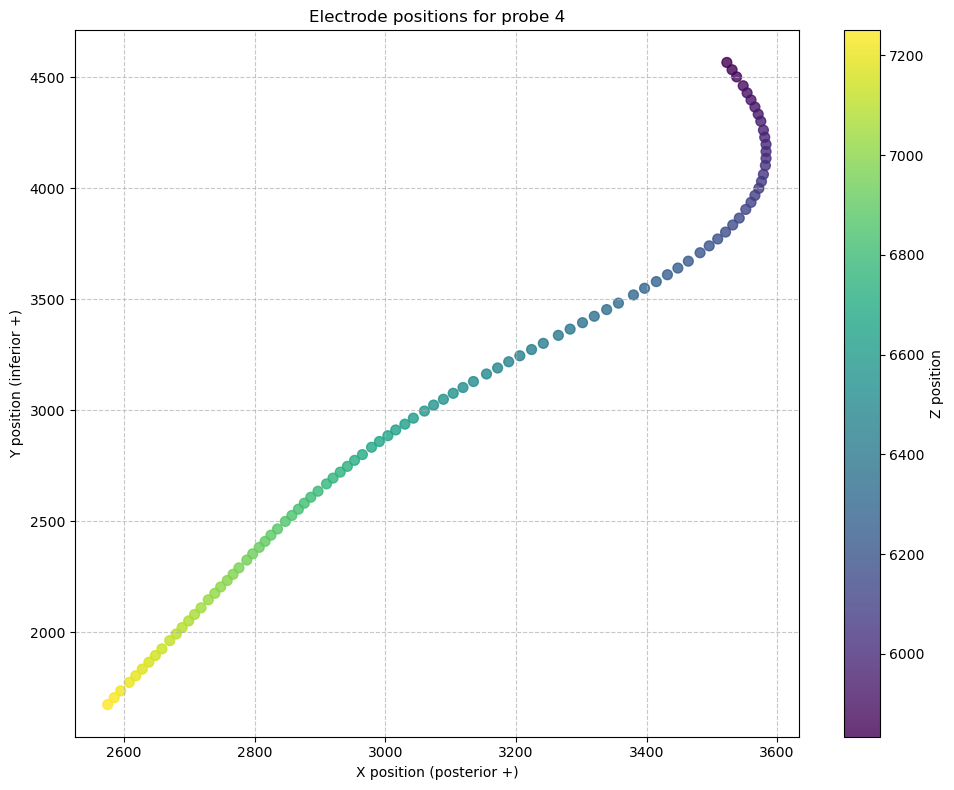

In [14]:
# Plot the electrode positions
plt.figure(figsize=(10, 8))
plt.scatter(electrodes_df['x'], electrodes_df['y'], c=electrodes_df['z'], 
            cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Z position')
plt.xlabel('X position (posterior +)')
plt.ylabel('Y position (inferior +)')
plt.title('Electrode positions for probe 4')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's look at the brain regions where electrodes are located:

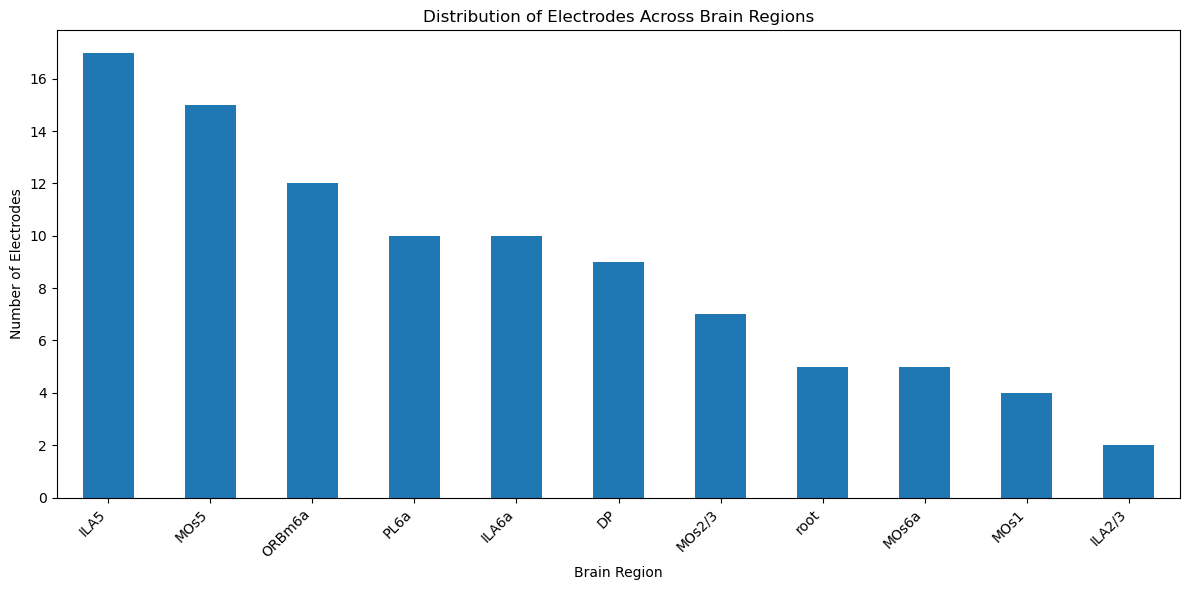

In [15]:
# Count the occurrences of each brain region
region_counts = electrodes_df['location'].value_counts()

# Plot the distribution of brain regions
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.xlabel('Brain Region')
plt.ylabel('Number of Electrodes')
plt.title('Distribution of Electrodes Across Brain Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Exploring LFP Data

Now let's look at the LFP (Local Field Potential) data from this probe:

In [16]:
# Access LFP data
lfp = nwb.acquisition['probe_4_lfp']
lfp_data = lfp.electrical_series['probe_4_lfp_data']

# Print basic information about the LFP data
print(f"LFP data shape: {lfp_data.data.shape}")
print(f"Number of time points: {lfp_data.data.shape[0]}")
print(f"Number of channels: {lfp_data.data.shape[1]}")
print(f"Unit: {lfp_data.unit}")
print(f"Timestamps length: {len(lfp_data.timestamps)}")
print(f"Timestamps unit: {lfp_data.timestamps_unit}")

LFP data shape: (8962735, 96)
Number of time points: 8962735
Number of channels: 96
Unit: volts
Timestamps length: 8962735
Timestamps unit: seconds


Let's plot a small segment of the LFP data for a few channels to visualize the signals:

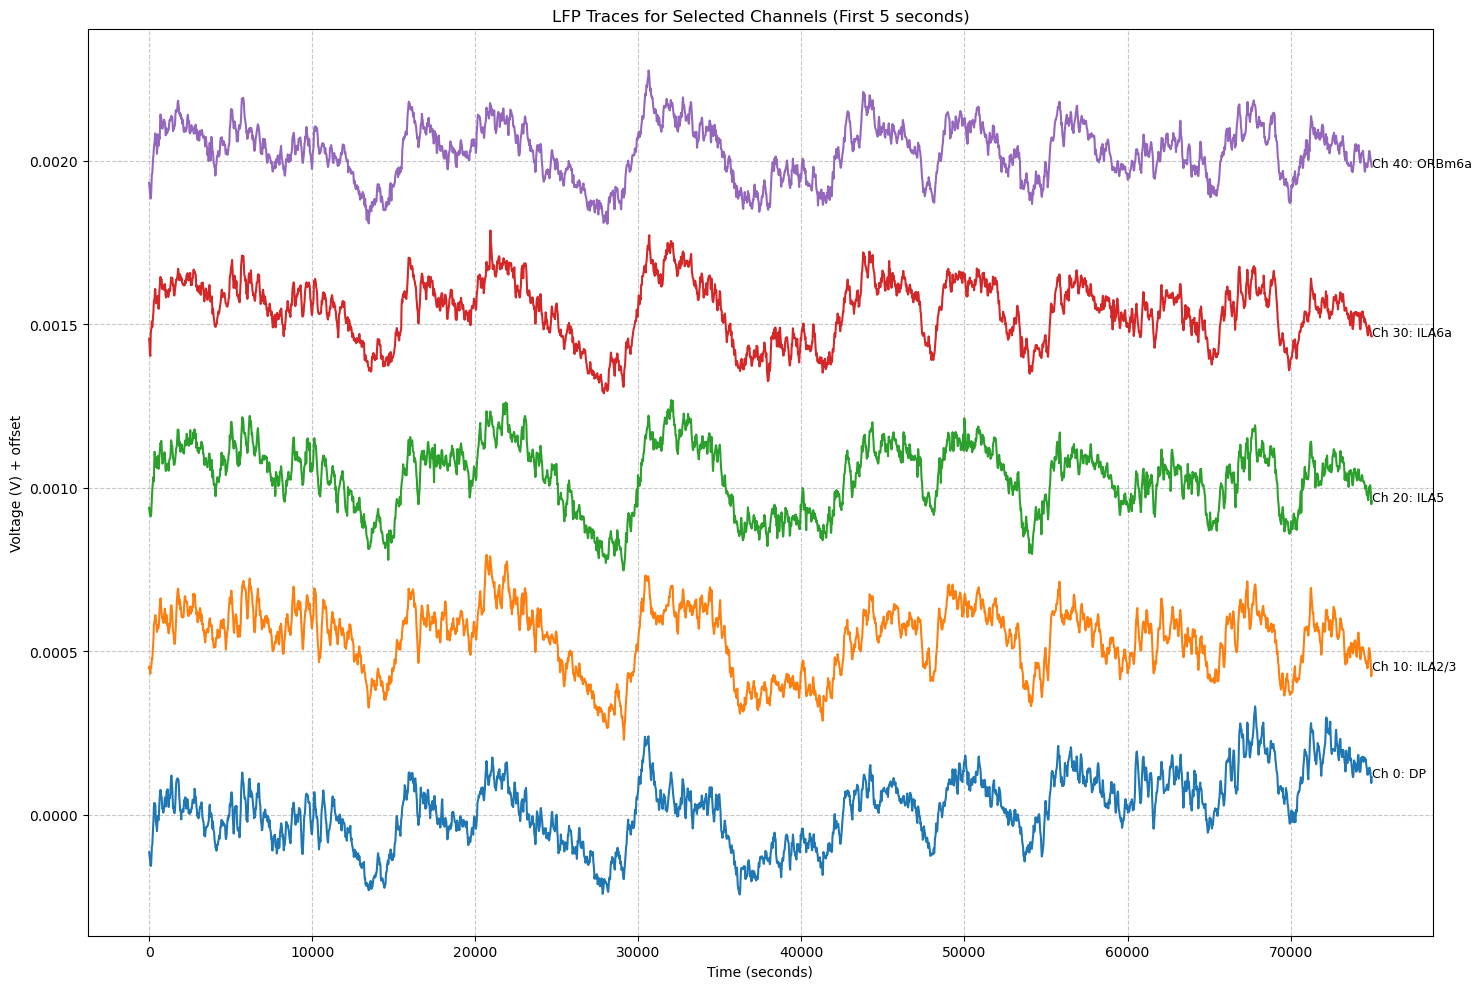

In [17]:
# Define time window to plot (first 5 seconds)
sampling_rate = 625.0  # From electrode group's lfp_sampling_rate
start_time = 0
duration = 5  # seconds
start_idx = int(start_time * sampling_rate)
end_idx = int((start_time + duration) * sampling_rate)

# Select a few channels to plot
channels_to_plot = [0, 10, 20, 30, 40]

# Plot LFP traces
plt.figure(figsize=(15, 10))
for i, channel in enumerate(channels_to_plot):
    # Offset each trace for clarity
    offset = i * 0.0005  # Adjust based on signal amplitude
    
    # Get data for this channel
    trace = lfp_data.data[start_idx:end_idx, channel] + offset
    
    # Get timestamps
    times = lfp_data.timestamps[start_idx:end_idx]
    
    # Plot
    plt.plot(times, trace, label=f'Channel {channel}')
    
    # Mark the location of this channel
    region = electrodes_df.iloc[channel]['location']
    plt.text(times[-1] + 0.1, trace[-1], f"Ch {channel}: {region}", fontsize=9)

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V) + offset')
plt.title(f'LFP Traces for Selected Channels (First {duration} seconds)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's compute and visualize the power spectrum for a few channels:

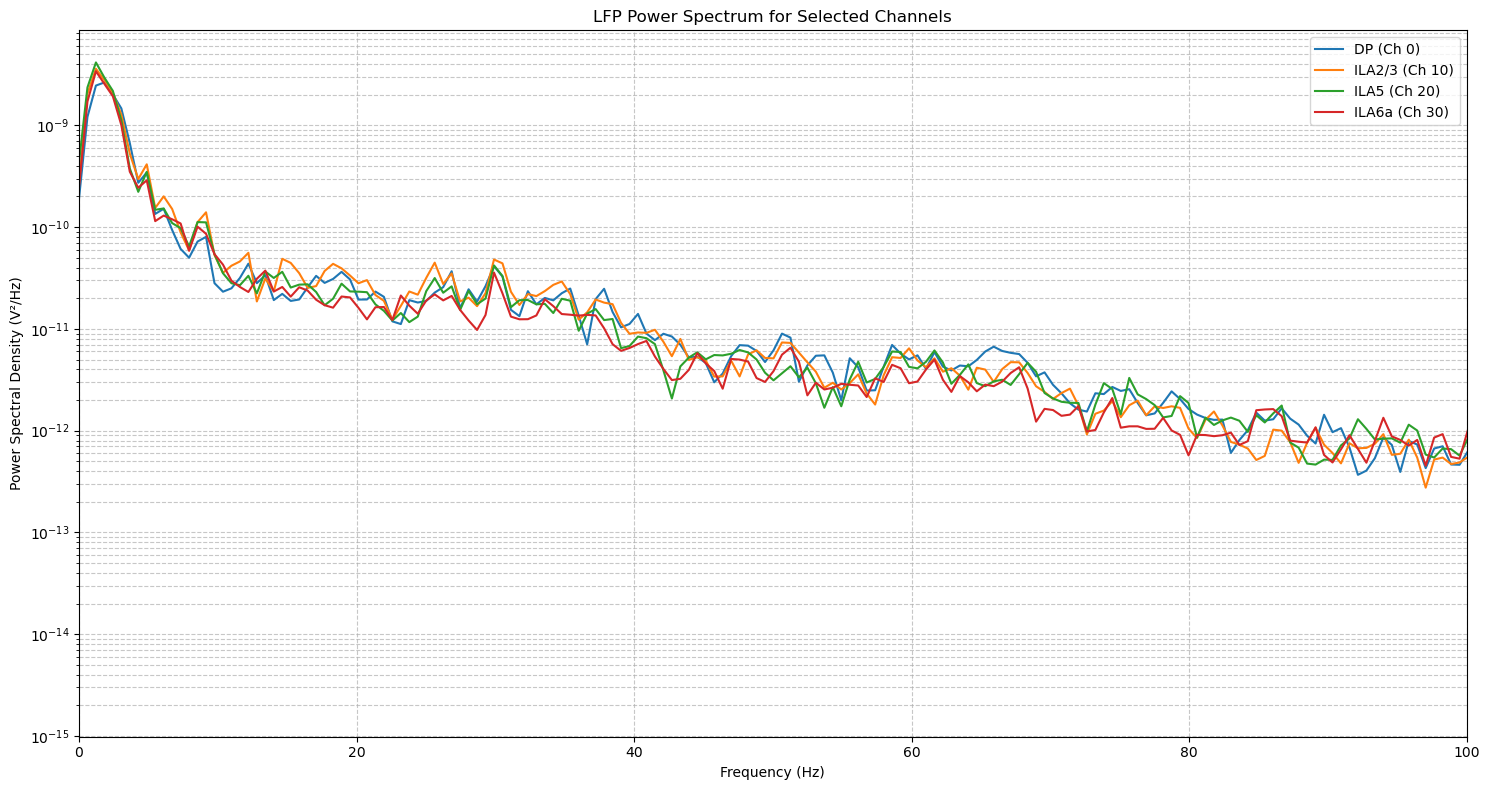

In [18]:
from scipy import signal

# Select a shorter segment for spectral analysis (10 seconds)
duration_spectral = 10  # seconds
end_idx_spectral = int((start_time + duration_spectral) * sampling_rate)

# Select a few channels to analyze
channels_to_analyze = [0, 10, 20, 30]

# Compute and plot power spectra
plt.figure(figsize=(15, 8))

for channel in channels_to_analyze:
    # Get data for this channel
    trace = lfp_data.data[start_idx:end_idx_spectral, channel]
    
    # Get the brain region for this channel
    region = electrodes_df.iloc[channel]['location']
    
    # Compute power spectrum
    freqs, psd = signal.welch(trace, fs=sampling_rate, nperseg=1024)
    
    # Plot
    plt.semilogy(freqs, psd, label=f'{region} (Ch {channel})')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V²/Hz)')
plt.title('LFP Power Spectrum for Selected Channels')
plt.xlim(0, 100)  # Focus on 0-100 Hz range
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's create a heatmap to visualize the LFP activity across all channels over time:

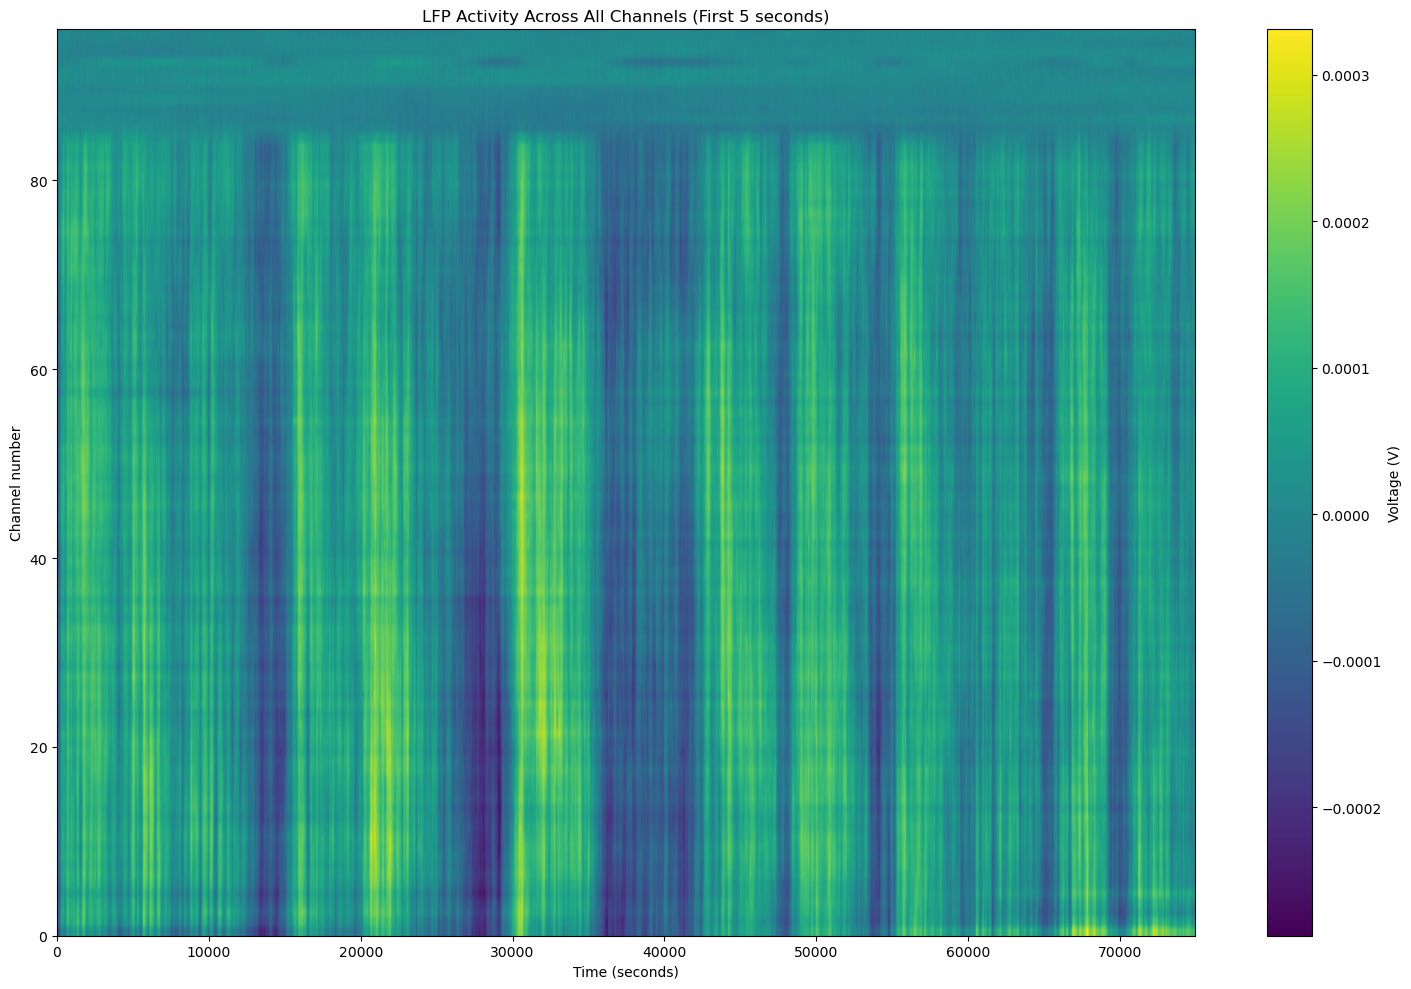

In [19]:
# Create a time-channel heatmap for a short segment
duration_heatmap = 5  # seconds
end_idx_heatmap = int((start_time + duration_heatmap) * sampling_rate)

# Get the data for all channels
data_segment = lfp_data.data[start_idx:end_idx_heatmap, :]
time_segment = lfp_data.timestamps[start_idx:end_idx_heatmap]

# Create a heatmap
plt.figure(figsize=(15, 10))
plt.imshow(data_segment.T, aspect='auto', origin='lower', 
           extent=[time_segment[0], time_segment[-1], 0, data_segment.shape[1]],
           cmap='viridis')

plt.colorbar(label='Voltage (V)')
plt.xlabel('Time (seconds)')
plt.ylabel('Channel number')
plt.title(f'LFP Activity Across All Channels (First {duration_heatmap} seconds)')
plt.tight_layout()
plt.show()

## Analyzing Electrode Properties

Let's look at some of the properties of the electrodes. First, we'll check if the 'imp' column has valid data:

In [20]:
# Check if impedance values exist and are valid
print(f"Impedance column exists: {'imp' in electrodes_df.columns}")
if 'imp' in electrodes_df.columns:
    print(f"Number of non-NaN impedance values: {electrodes_df['imp'].notna().sum()} out of {len(electrodes_df)}")
    
    # If there are valid values, we can visualize them
    if electrodes_df['imp'].notna().sum() > 0:
        plt.figure(figsize=(10, 6))
        valid_imp = electrodes_df['imp'].dropna()
        plt.hist(valid_imp, bins=20, alpha=0.7, color='blue')
        plt.xlabel('Impedance (ohms)')
        plt.ylabel('Number of Electrodes')
        plt.title('Distribution of Electrode Impedance Values')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("All impedance values are NaN. Skipping histogram.")
else:
    print("Impedance data not available.")

Impedance column exists: True
Number of non-NaN impedance values: 0 out of 96
All impedance values are NaN. Skipping histogram.


Let's examine the relationship between electrode position and brain region:

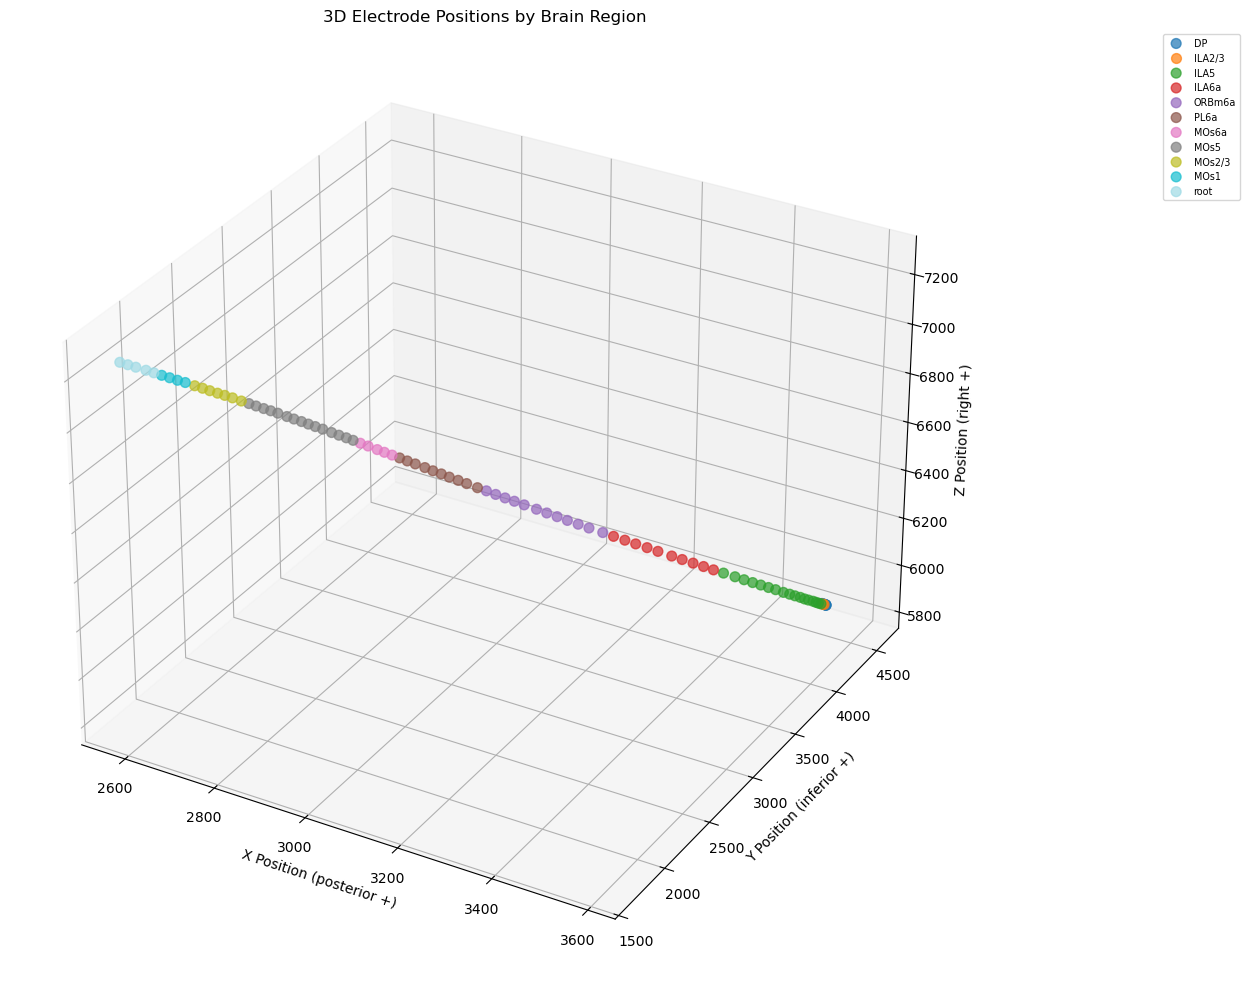

In [21]:
# Create a 3D plot of electrode positions, colored by brain region
from mpl_toolkits.mplot3d import Axes3D

# Get unique regions and assign colors
unique_regions = electrodes_df['location'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_regions)))
region_color_map = dict(zip(unique_regions, colors))

# Create 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each region with a different color
for region in unique_regions:
    region_df = electrodes_df[electrodes_df['location'] == region]
    ax.scatter(region_df['x'], region_df['y'], region_df['z'], 
               c=[region_color_map[region]] * len(region_df),
               label=region, s=50, alpha=0.7)

ax.set_xlabel('X Position (posterior +)')
ax.set_ylabel('Y Position (inferior +)')
ax.set_zlabel('Z Position (right +)')
ax.set_title('3D Electrode Positions by Brain Region')

# Add a legend (with smaller font to fit)
ax.legend(fontsize='x-small', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

## Examining Probe Technical Information

In [22]:
# Explore the probe's technical properties
probe_device = nwb.devices['probeF']
print("Probe Information:")
print(f"Description: {probe_device.description}")
print(f"Manufacturer: {probe_device.manufacturer}")
print(f"Sampling rate: {probe_device.sampling_rate} Hz")
print(f"Probe ID: {probe_device.probe_id}")

Probe Information:
Description: Neuropixels 1.0 Probe
Manufacturer: imec
Sampling rate: 30000.0 Hz
Probe ID: 4


Let's visualize the probe's channel layout by plotting the horizontal and vertical positions:

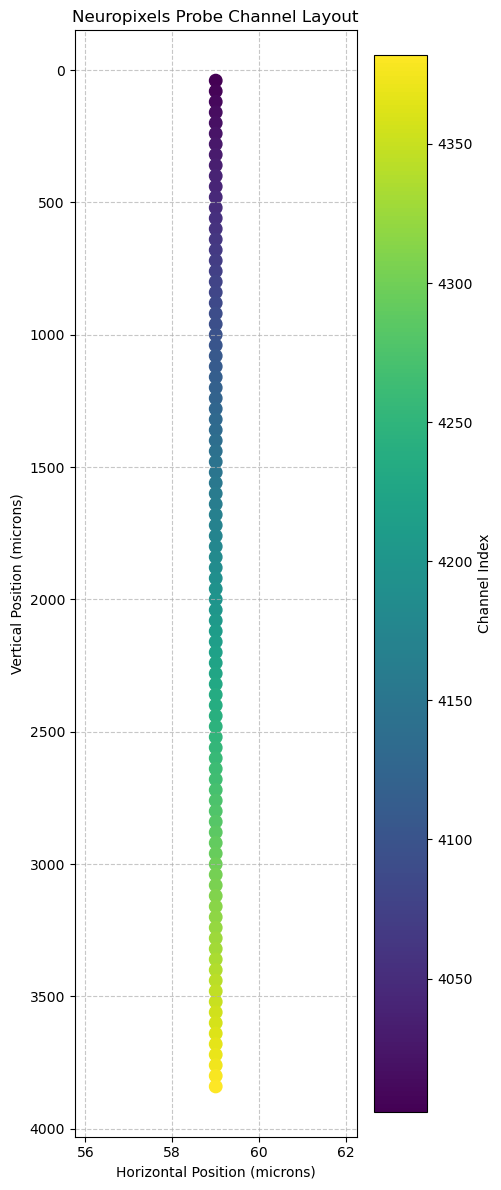

In [23]:
# Check if the position data exists
has_position_data = ('probe_horizontal_position' in electrodes_df.columns and 
                     'probe_vertical_position' in electrodes_df.columns)

if has_position_data:
    # Plot the physical layout of electrodes on the probe
    plt.figure(figsize=(5, 12))
    plt.scatter(electrodes_df['probe_horizontal_position'], 
                electrodes_df['probe_vertical_position'], 
                c=electrodes_df.index, cmap='viridis', s=80)
    plt.colorbar(label='Channel Index')
    plt.xlabel('Horizontal Position (microns)')
    plt.ylabel('Vertical Position (microns)')
    plt.title('Neuropixels Probe Channel Layout')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()  # Invert y-axis to match conventional probe layout drawings
    plt.tight_layout()
    plt.show()
else:
    print("Probe position data not available in the electrodes table.")

Let's look at which electrodes have valid data:

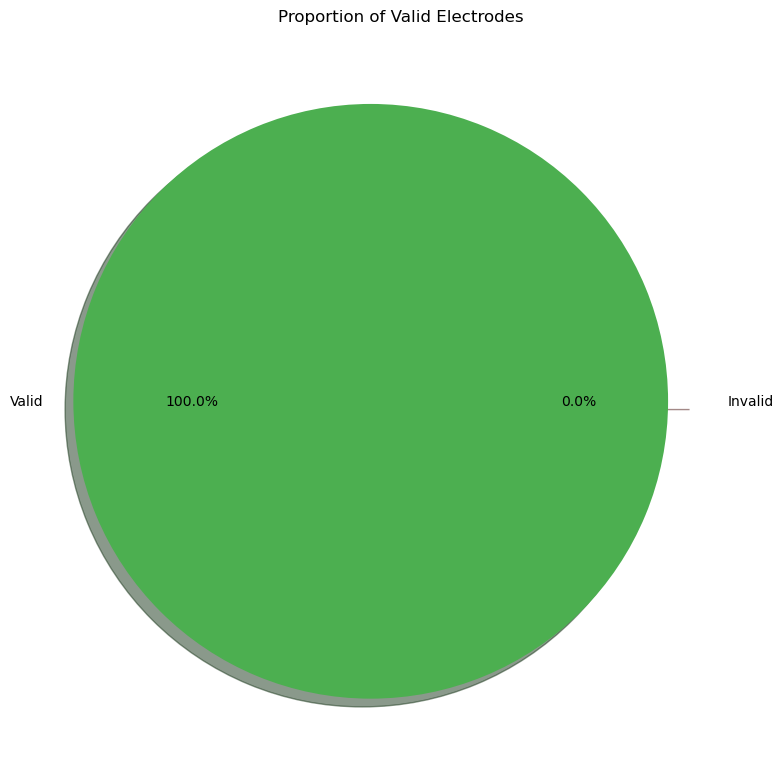

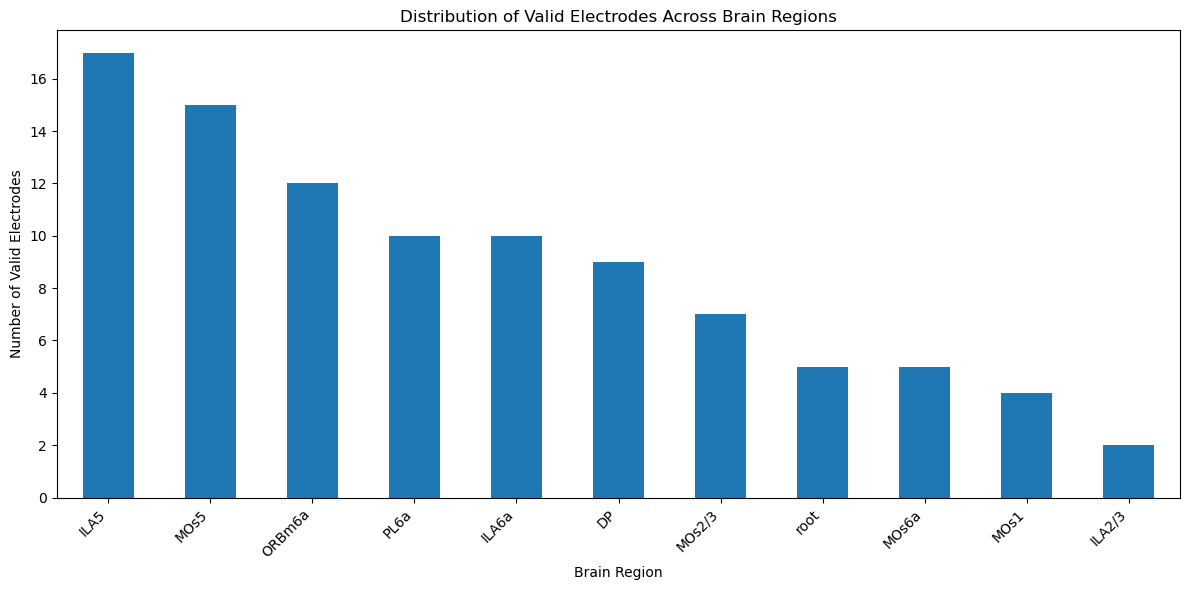

In [24]:
# Check if valid_data column exists
if 'valid_data' in electrodes_df.columns:
    # Count valid vs invalid electrodes
    valid_count = electrodes_df['valid_data'].sum()
    invalid_count = len(electrodes_df) - valid_count
    
    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie([valid_count, invalid_count], 
            labels=['Valid', 'Invalid'], 
            autopct='%1.1f%%',
            colors=['#4CAF50', '#F44336'],
            explode=(0.1, 0),
            shadow=True)
    plt.title('Proportion of Valid Electrodes')
    plt.tight_layout()
    plt.show()
    
    # Show distribution of valid electrodes across brain regions
    if valid_count > 0:
        valid_regions = electrodes_df[electrodes_df['valid_data']]['location'].value_counts()
        
        plt.figure(figsize=(12, 6))
        valid_regions.plot(kind='bar')
        plt.xlabel('Brain Region')
        plt.ylabel('Number of Valid Electrodes')
        plt.title('Distribution of Valid Electrodes Across Brain Regions')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
else:
    print("Valid data information not available in the electrodes table.")

## Summary and Next Steps

In this notebook, we've explored the Allen Institute Openscope - Vision2Hippocampus project dataset (Dandiset 000690), which contains Neuropixel recordings from mice viewing various visual stimuli. We've:

1. Examined the metadata of the Dandiset
2. Explored the file structure and organization
3. Loaded and analyzed a sample NWB file for probe 4 from subject 692077
4. Visualized LFP data, including time traces and power spectra
5. Examined electrode locations and their distribution across brain regions

For further exploration, researchers might:

- Analyze neural responses to specific visual stimuli mentioned in the dataset description
- Compare data across different probes and brain regions
- Perform spike sorting or other advanced analyses on the raw data
- Correlate neural activity with the specific stimuli presented (moving bars, natural movies)